## **Problem Statement**
# Use decision trees to prepare a model on fraud data
## treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## 0.1 Table of Contents<a class="anchor" id="0.1"></a>
1. [Introduction](#1)
2. [About Dataset](#2)
3. [Data Exploration](#3)
    - 3.1 [Descriptive Analysis](#3.1)
    - 3.2 [Feature Engineering](#3.2)
4. [Exploratory Data Analysis](#4)
    - 4.1 [Univariate plots](#4.1)
    - 4.2 [Multivariate plots](#4.2)
5. [Data Pre-Processing](#5)
    - 5.1 [Test Train Split With Imbalanced Dataset](#5.1)
6. [When to stop splitting?](#6)
    - 6.1 [Grid search using Stratified Kfold Splits on Imbalanced Dataset](#6.1)
    - 6.2 [Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset](#6.2)
7. [Handling imbalance data using SMOTE based techniques](#7)
    - 7.1 [SMOTE Oversampling technique](#7.1)
    - 7.2 [ADASYN: Adaptive Synthetic Sampling Approach](#7.2)
    - 7.3 [Hybridization: SMOTE + Tomek Links](#7.3)
    - 7.4 [Hybridization: SMOTE + ENN](#7.4)
    - 7.5 [SMOTE + UNDER SAMPLING](#7.5)
    - 7.6 [Performance Analysis after Resampling](#7.6)
8. [Pruning](#8)
    - 8.1 [Building Decision Tree Classifier using Entropy Criteria with Alpha values Post Pruning](#8.1)
        - - 8.1.1 [Accuracy vs alpha for training and testing sets](#8.1.1)
    - 8.2 [Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning](#8.2)
        - - 8.2.1 [Accuracy vs alpha for training and testing sets](#8.2.1)
9. [Advantages of CART](#9)
10. [Disadvantages of CART](#10)

## 1. Introduction:<a class="anchor" id="1"></a>
### What is a Decision Tree?
+ #### Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
+ #### In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
+ #### The decisions or the test are performed on the basis of features of the given dataset.
+ #### It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
+ #### It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
+ #### In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
+ #### A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Dataset
df = pd.read_csv('/content/Fraud_check.csv')
df

Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595                7   YES  
596                2   YES  
597                0   YES  
598               17    NO  
599               16    NO  

[600 rows x 6 columns]

## 2. About Dataset<a class="anchor" id="2"></a>
Context\
Data Description :

+ Undergrad : person is under graduated or not
+ Marital.Status : marital status of a person
+ Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government
+ Work Experience : Work experience of an individual person
+ Urban : Whether that person belongs to urban area or not

[Table of Contents](#0.1)

## 3. Data Exploration <a class="anchor" id="3"></a>

Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [ ]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [ ]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

- We have no missing data so all the entries are valid for use.

- Now we can check the column names to get a better understanding of what features we will be basing our classification on.

### 3.1 Descriptive Analysis<a class="anchor" id="3.1"></a>

In [ ]:
df.shape

(600, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
df[df.duplicated()].shape

(0, 6)

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [Undergrad, Marital.Status, Taxable.Income, City.Population, Work.Experience, Urban]
Index: []

In [ ]:
df.describe()

Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99619.000000    199778.000000        30.000000

The features are not on the same scale. For example `City.Population` has a mean of `108747.36` while `Work.Experience` has a mean value of `15.55`. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check further.

### 3.2 Feature Engineering<a class="anchor" id="3.2"></a>

[Table of Contents](#0.1)

### Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [ ]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df.copy()
df1['taxable_category'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
df1.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban taxable_category  
0   YES             Good  
1   YES             Good  
2   YES             Good  
3   YES             Good  
4    NO             Good

In [ ]:
categorical_features = df.describe(include=["object"]).columns
categorical_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [ ]:
numerical_features = df.describe(include=["int64"]).columns
numerical_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

## 4. Data Visualization<a class="anchor" id="4"></a>

[Table of Contents](#0.1)

+ ###  Univariate plots<a class="anchor" id="4.1"></a>

Next let's get the distribution of animal data across the types of classes.

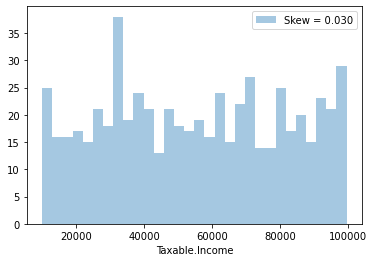

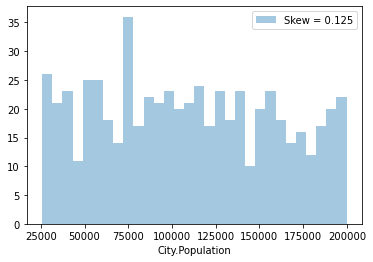

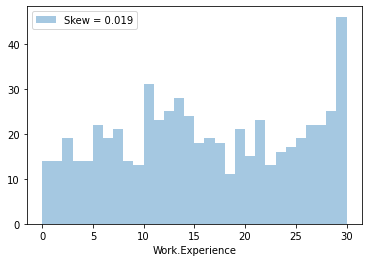

In [ ]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers. Let's identify the indices of the observations containing outliers using Turkey's method.

In [ ]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features]))))

The dataset contains 0 observations with more than 2 outliers


##### Mmm hmm! there exists no observations with multiple outliers.

Let's examine the boxplots for the several distributions

In [ ]:
numerical_features

['Taxable.Income', 'City.Population', 'Work.Experience']

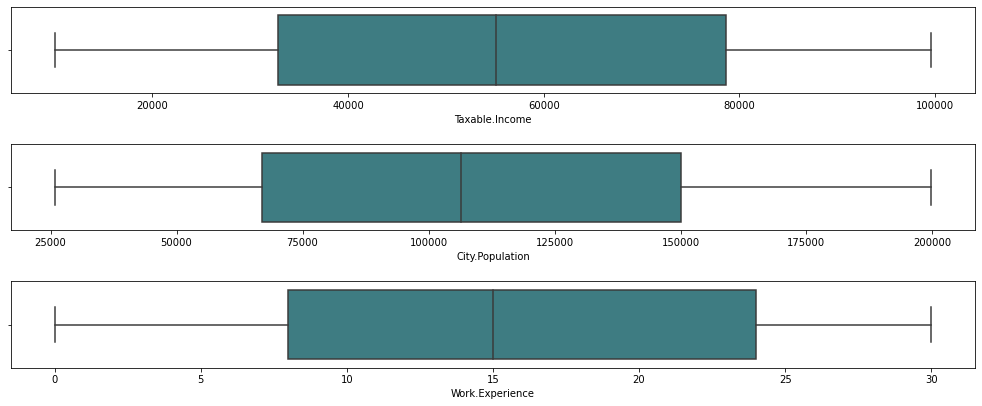

In [ ]:
ot=df.copy()
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='City.Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

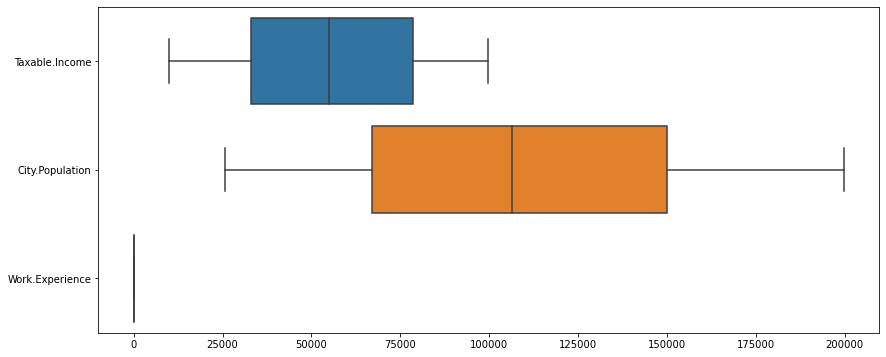

In [ ]:
#outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient="h");

#### Unsurprisingly, **`Work.Experience`** has a mean that is much inferior to the other constituents as we already saw in the previous section.

[Table of Contents](#0.1)

+ ### Multivariate Analysis<a class="anchor" id="4.2"></a>


Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

<Figure size 576x576 with 0 Axes>

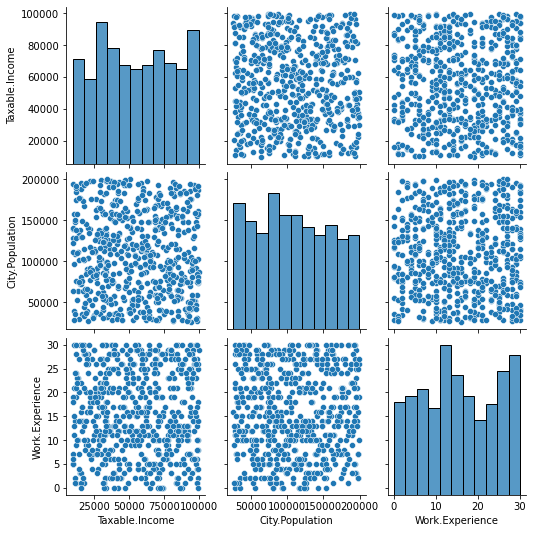

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<AxesSubplot:>

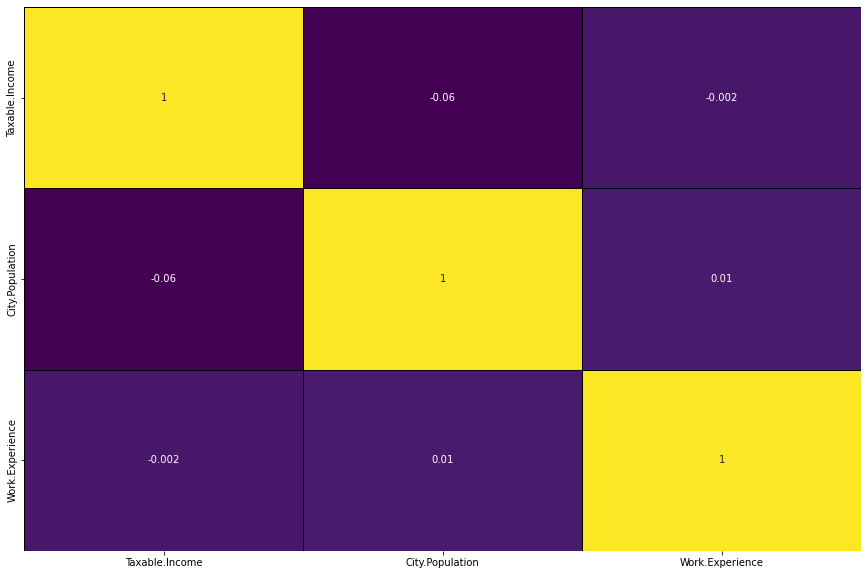

In [ ]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')


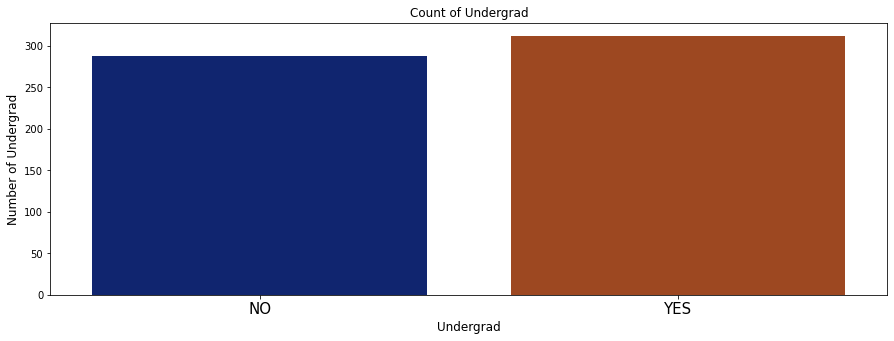

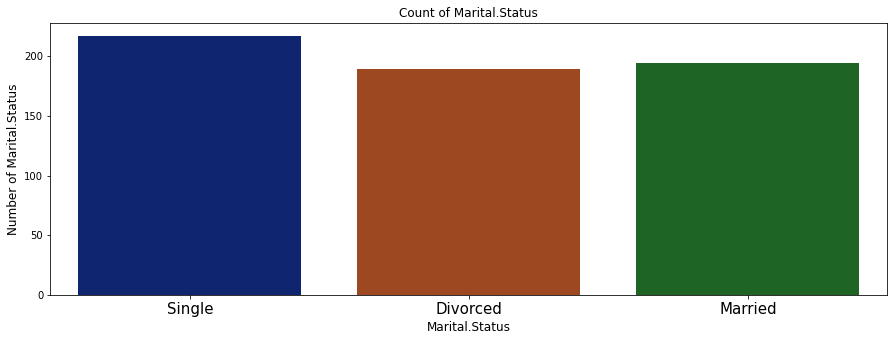

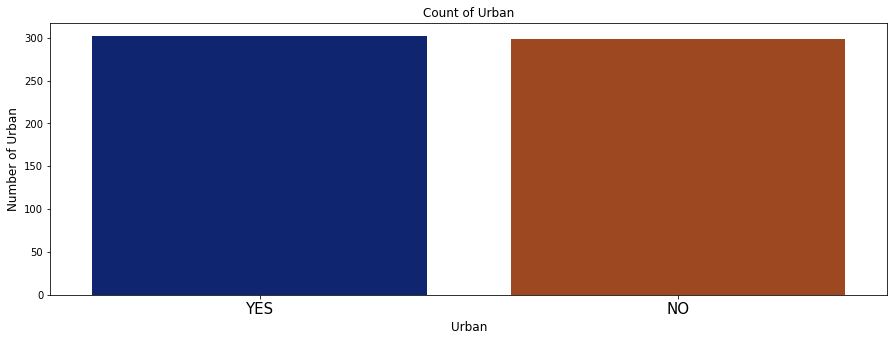

In [ ]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    unique = df[column].value_counts(ascending=True);

    #plt.subplot(1, len(categorical_features), idx+1)
    plt.title("Count of "+ column)
    sns.countplot(data=df, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 0, size = 15)

    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

In [ ]:
def factorplot(param):
    sns.factorplot(x =param, size = 7, aspect = 2, data = df, y= "Taxable.Income", palette = "dark")
    plt.xlabel("\n" + param)
    plt.ylabel("Sales\n")
    plt.show()

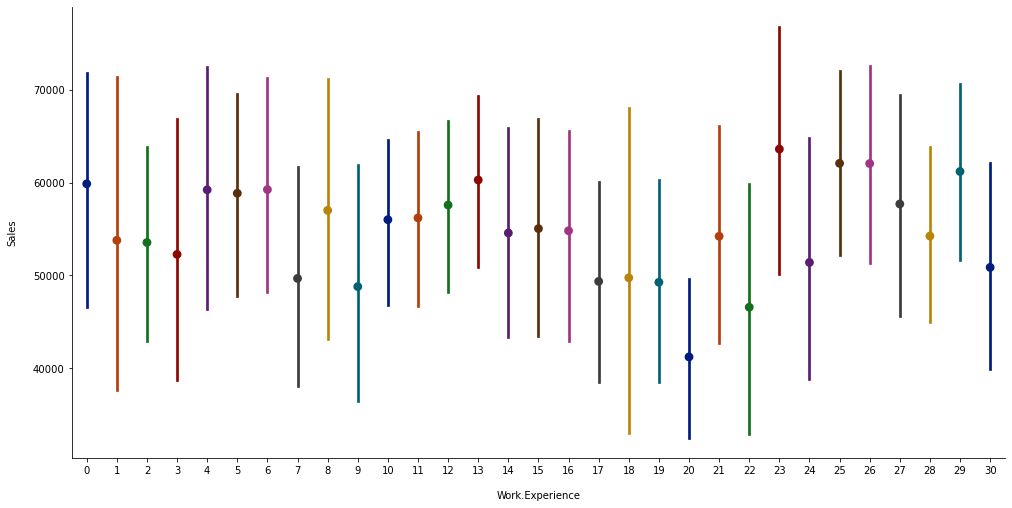

In [ ]:
factorplot("Work.Experience")

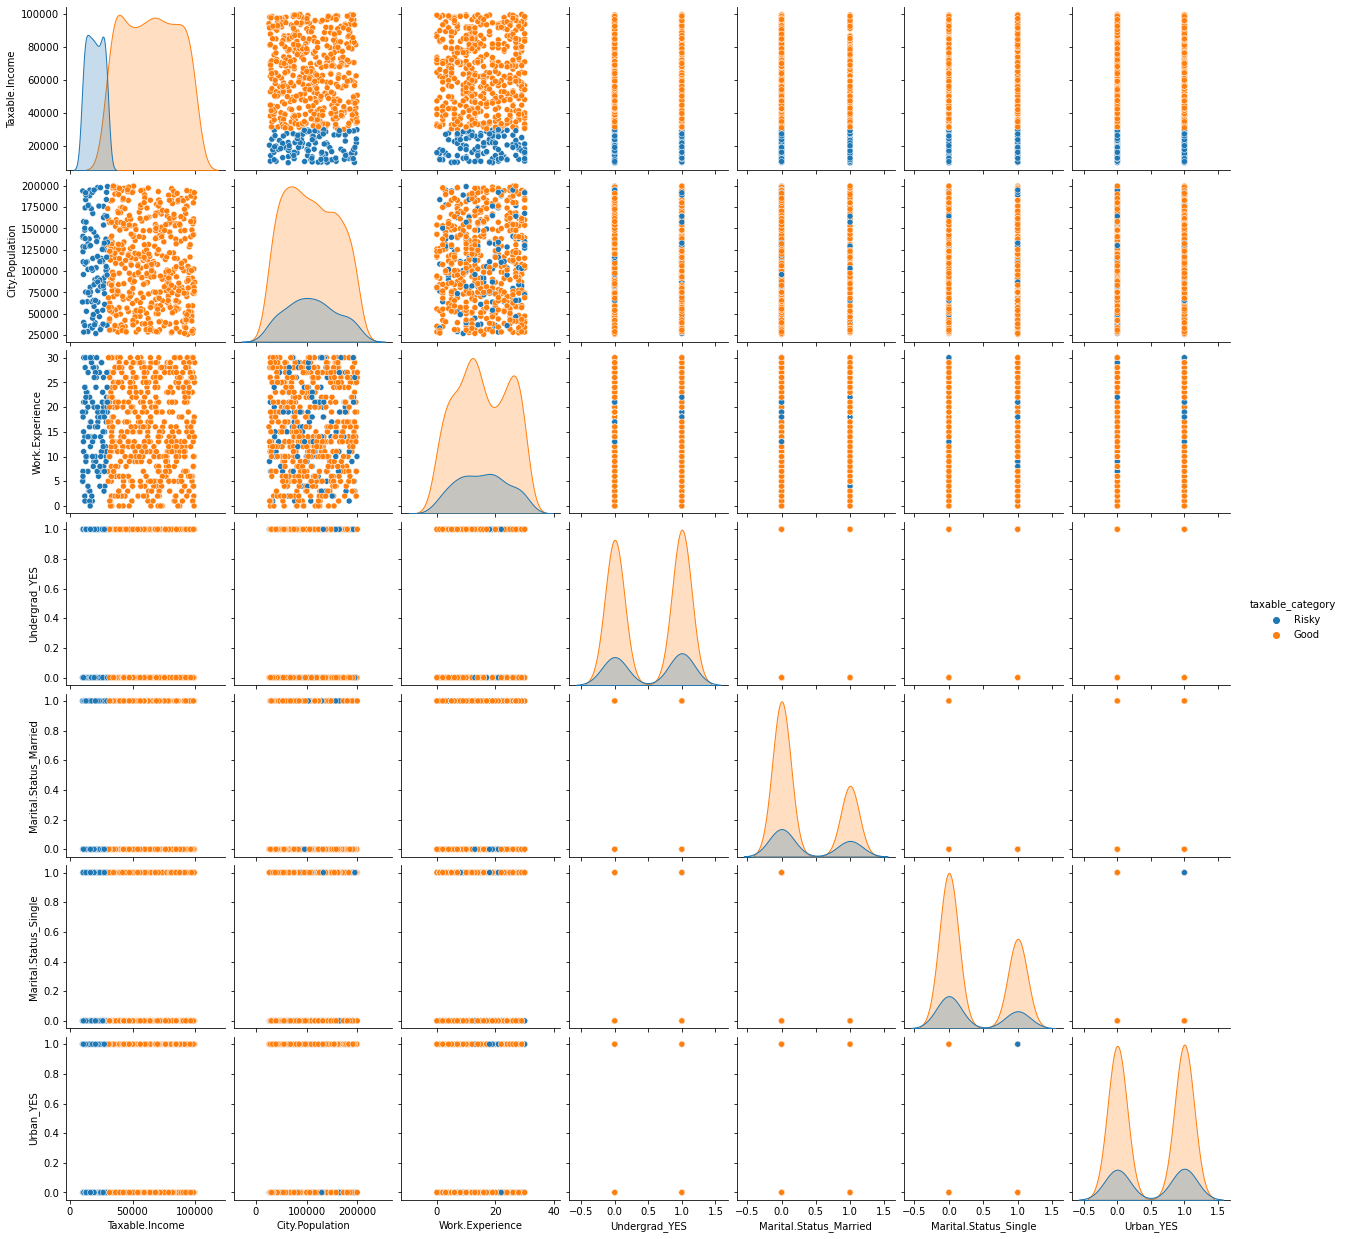

In [ ]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df1, hue = 'taxable_category')

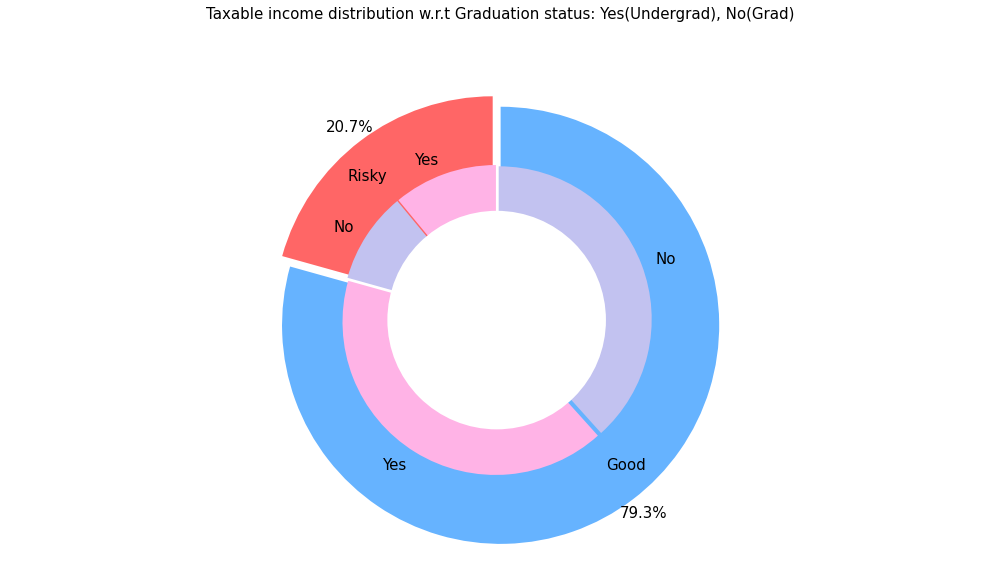

In [ ]:
plt.figure(figsize=(14, 8))
labels =["Risky", "Good"]
values = [df1["taxable_category"][df1["taxable_category"] == 'Risky'].groupby(by = df1.Undergrad).count().sum(),
         df1["taxable_category"][df1["taxable_category"] == 'Good'].groupby(by = df1.Undergrad).count().sum()]
labels_gender = ["Yes","No","Yes","No"]
sizes_gender = [66,58 , 246,230]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0','#ffb3e6', '#c2c2f0']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Taxable income distribution w.r.t Graduation status: Yes(Undergrad), No(Grad)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

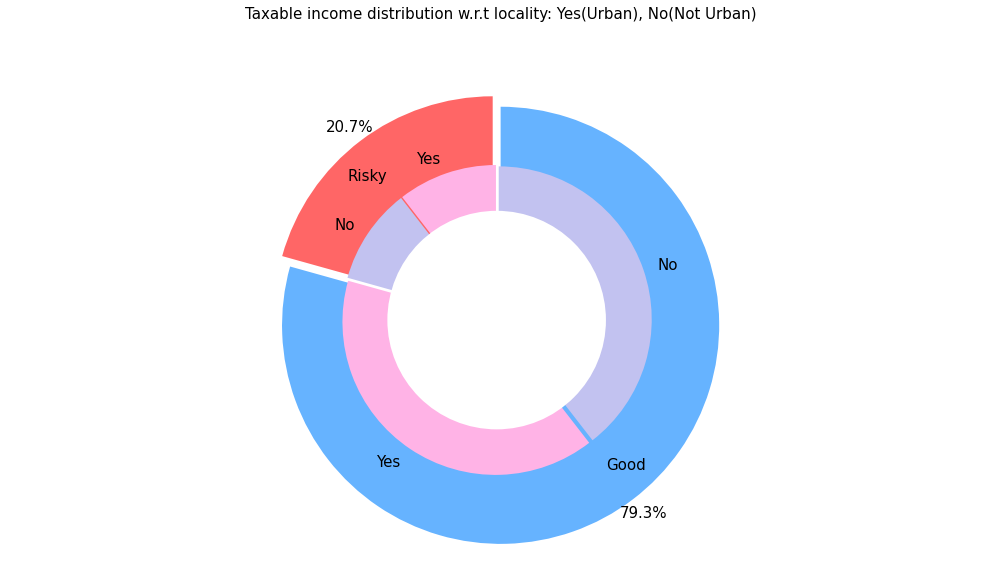

In [ ]:
plt.figure(figsize=(14, 8))
labels =["Risky", "Good"]
values = [df1["taxable_category"][df1["taxable_category"] == 'Risky'].groupby(by = df1.Urban).count().sum(),
         df1["taxable_category"][df1["taxable_category"] == 'Good'].groupby(by = df1.Urban).count().sum()]
labels_gender = ["Yes","No","Yes","No"]
sizes_gender = [63,61 , 239,237]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0','#ffb3e6', '#c2c2f0']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Taxable income distribution w.r.t locality: Yes(Urban), No(Not Urban)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

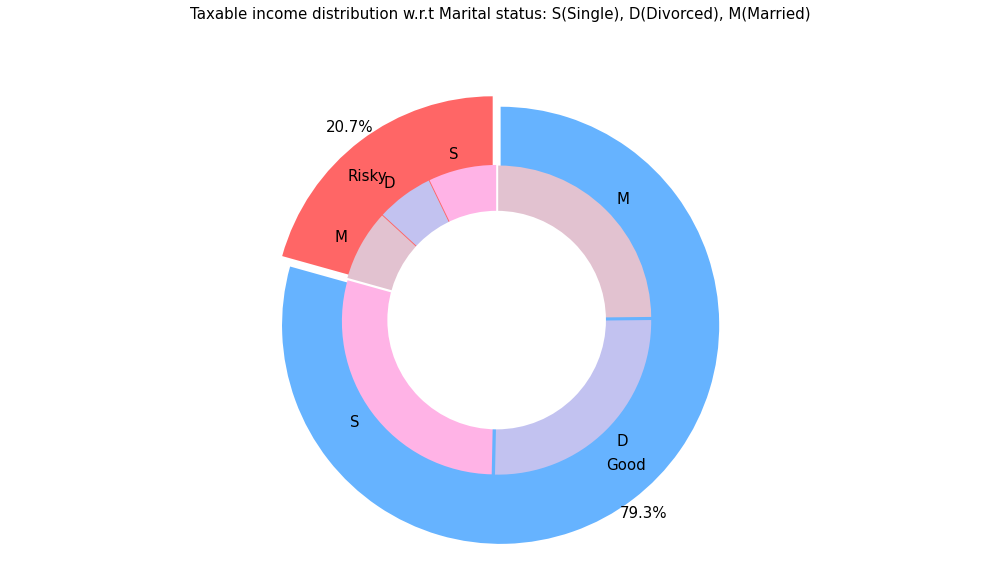

In [ ]:
plt.figure(figsize=(14, 8))
labels =["Risky", "Good"]
values = [df1["taxable_category"][df1["taxable_category"] == 'Risky'].groupby(by = df1["Marital.Status"]).count().sum(),
         df1["taxable_category"][df1["taxable_category"] == 'Good'].groupby(by = df1["Marital.Status"]).count().sum()]
labels_gender = ["","D","M","S","D", "M"]
sizes_gender = [43,36,45,174,153,149]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#ffb3e6','#c2c2f0','#e2c2d0','#ffb3e6', '#c2c2f0', '#e2c2d0']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Taxable income distribution w.r.t Marital status: S(Single), D(Divorced), M(Married)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()

#### Checking for Imbalanced or balanced dataset with regards to the Target

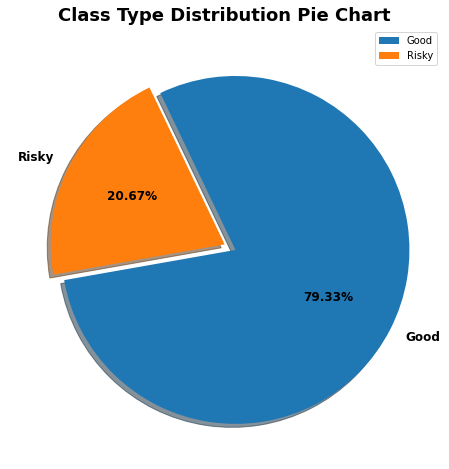

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(df1['taxable_category'].value_counts(),
       labels=df1.taxable_category.unique(),
       explode = [0.07,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

##### Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Here, the class “Good” is called the majority class, and the much smaller in size “Risky” class is called the minority class.

In [ ]:
countNotermdeposit = len(df1[df1['taxable_category'] == 'Good'])
counthavetermdeposit = len(df1[df1['taxable_category'] == 'Risky'])
print("Percentage of Customer doesn't have a term deposit: {:.2f}%".format((countNotermdeposit / (len(df.taxable_category))*100)))
print("Percentage of Customer have a term deposit: {:.2f}%".format((counthavetermdeposit / (len(df.taxable_category))*100)))

Percentage of Customer doesn't have a term deposit: 79.33%
Percentage of Customer have a term deposit: 20.67%


In [ ]:
df1.taxable_category.value_counts()

Good     476
Risky    124
Name: taxable_category, dtype: int64

Text(0.5, 1.0, 'Risky or Good for Individual Taxable Income ')

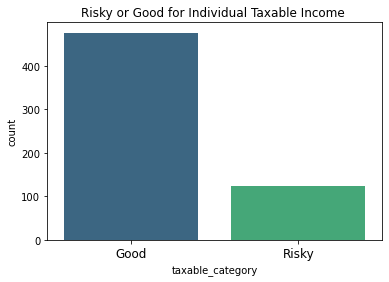

In [ ]:
sns.countplot(x='taxable_category', data=df1, palette = 'viridis',
              order=df1['taxable_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Risky or Good for Individual Taxable Income ')

### Problems with imbalanced data classification
If we explain it in a very simple manner, the main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class?

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. In this case, the confusion matrix for the classification problem shows how well our model classifies the target classes and we arrive at the accuracy of the model from the confusion matrix.

It is calculated based on the total no of correct predictions by the model divided by the total no of predictions. In the an example case it is (0+95)/(0+95+0+5)=0.95 or 95%. It means that the model fails to identify the minority class yet the accuracy score of the model will be 95%

Thus our traditional approach of classification and model accuracy calculation is not useful in the case of the imbalanced dataset

## 5. Data Pre-Processing<a class="anchor" id="5"></a>

[Table of Contents](#0.1)

In [ ]:
data = df1.copy()
data.rename(columns={'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income','Work.Experience':'Work_Experience','City.Population':'City_Population'}, inplace = True)
data.drop('Taxable_Income', axis=1, inplace = True)
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['Undergrad', 'Marital_Status', 'Urban', 'taxable_category'], dtype='object')

In [ ]:
#Creating dummy vairables of the categorical features
le = LabelEncoder()
for col in categorical_features:
        le.fit(data[col])
        data[col] = le.transform(data[col])
data.head()

Undergrad  Marital_Status  City_Population  Work_Experience  Urban  \
0          0               2            50047               10      1   
1          1               0           134075               18      1   
2          0               1           160205               30      1   
3          1               2           193264               15      1   
4          0               1            27533               28      0   

   taxable_category  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [ ]:
data.taxable_category.value_counts()

0    476
1    124
Name: taxable_category, dtype: int64

## 5.1 Test Train Split With Imbalanced Dataset<a class="anchor" id="5.1"></a>



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

***Cross Validation***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)



[Table of Contents](#0.1)

### ***About Stratify*** :
+ Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In machine learning, When we want to train our ML model we split our entire dataset into training_set and test_set using train_test_split() class present in sklearn. Then we train our model on training_set and test our model on test_set. The problems that we are going to face in this method are:

Whenever we change the random_state parameter present in train_test_split(), We get different accuracy for different random_state and hence we can’t exactly point out the accuracy for our model.
The train_test_split() splits the dataset into training_test and test_set by random sampling. But stratified sampling is performed.

What are random sampling and Stratified sampling?
Suppose you want to take a survey and decided to call 1000 people from a particular state, If you pick either 1000 males completely or 1000 females completely or 900 females and 100 males (randomly) to ask their opinion on a particular product. Then based on these 1000 opinions you can’t decide the opinion of that entire state on your product. This is random sampling.
But in Stratified Sampling, Let the population for that state be 51.3% male and 48.7% female, Then for choosing 1000 people from that state if you pick 513 male ( 51.3% of 1000 ) and 487 female ( 48.7% for 1000 ) i.e 513 male + 487 female (Total=1000 people) to ask their opinion. Then these groups of people represent the entire state. This is called Stratified Sampling.

Why random sampling is not preferred in machine learning?
Let’s consider a binary-class classification problem. Let our dataset consists of 100 samples out of which 80 are negative class { 0 } and 20 are positive class { 1 }.

Random sampling:
If we do random sampling to split the dataset into training_set and test_set in an 8:2 ratio respectively.Then we might get all negative class {0} in training_set i.e 80 samples in training_test and all 20 positive class {1} in test_set.Now if we train our model on training_set and test our model on test_set, Then obviously we will get a bad accuracy score.

Stratified Sampling:
In stratified sampling, The training_set consists of 64 negative class{0} ( 80% 0f 80 ) and 16 positive class {1} ( 80% of 20 ) i.e. 64{0}+16{1}=80 samples in training_set which represents the original dataset in equal proportion and similarly test_set consists of 16 negative class {0} ( 20% of 80 ) and 4 positive class{1} ( 20% of 20 ) i.e. 16{0}+4{1}=20 samples in test_set which also represents the entire dataset in equal proportion.This type of train-test-split results in good accuracy.

What is the solution to mentioned problems?
The solution for the first problem where we were able to get different accuracy scores for different random_state parameter values is to use K-Fold Cross-Validation. But K-Fold Cross Validation also suffers from the second problem i.e. random sampling.
The solution for both the first and second problems is to use Stratified K-Fold Cross-Validation.

What is Stratified K-Fold Cross Validation?
Stratified k-fold cross-validation is the same as just k-fold cross-validation, But Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

For Reference : https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

In [ ]:
x = data.drop('taxable_category',axis=1)
y = data['taxable_category']

In [ ]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
    train, train1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test, test1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train, train1, test, test1))

>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=428, 1=112, Test: 0=48, 1=12
>Train: 0=429, 1=111, Test: 0=47, 1=13
>Train: 0=429, 1=111, Test: 0=47, 1=13
>Train: 0=429, 1=111, Test: 0=47, 1=13
>Train: 0=429, 1=111, Test: 0=47, 1=13


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [ ]:
# summarize
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=333, 1=87, Test: 0=143, 1=37


In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (420, 5)
Shape of X_test:  (180, 5)
Shape of y_train:  (420,)
Shape of y_test (180,)


## 6. When to stop splitting?<a class="anchor" id="6"></a>
You must be asking this question to yourself that when do we stop growing our tree? Usually, real-world datasets have a large number of features, which will result in a large number of splits, which in turn gives a huge tree. Such trees take time to build and can lead to overfitting. That means the tree will give very good accuracy on the training dataset but will give bad accuracy in test data.

There are many ways to tackle this problem through hyperparameter tuning. We can set the maximum depth of our decision tree using the <b>max_depth parameter</b>. The more the value of <b>max_depth</b>, the more complex your tree will be. The training error will off-course decrease if we increase the <b>max_depth</b> value but when our test data comes into the picture, we will get a very bad accuracy. Hence you need a value that will not overfit as well as underfit our data and for this, you can use GridSearchCV.

Another way is to set the minimum number of samples for each spilt. It is denoted by <b>min_samples_split</b>. Here we specify the minimum number of samples required to do a spilt. For example, we can use a minimum of 10 samples to reach a decision. That means if a node has less than 10 samples then using this parameter, we can stop the further splitting of this node and make it a leaf node.

There are more hyperparameters such as :

<b>min_samples_leaf</b> – `represents the minimum number of samples required to be in the leaf node. The more you increase the number, the more is the possibility of overfitting.`

<b>max_features</b> – `it helps us decide what number of features to consider when looking for the best split.`


[Table of Contents](#0.1)

### 6.1. Grid search using Stratified Kfold Splits on Imbalanced Dataset<a class="anchor" id="6.1"></a>

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(train_X, train_y)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(train_X, train_y)
print_score(tree_clf, train_X, train_y, test_X, test_y, train=True)
print_score(tree_clf, train_X, train_y, test_X, test_y, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 79.44%
_______________________________________________
CLASSIFICATION REPORT:
                    0      1  accuracy   macro avg  weighted avg
precision    0.794444    0.0  0.794444    0.397222      0.631142
recall       1.000000    0.0  0.794444    0.500000      0.794444
f1-score     0.885449    0.0  0.794444    0.442724      0.703440
support    429.000000  111.0  0.794444  540.000000    540.000000
_______________________________________________
Confusion Matrix: 
 [[429   0]
 [111   0]]

Test Result:
Accuracy Score: 78.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0     1  accuracy  macro avg  weighted avg
precision   0.783333   0.0  0.783333   0.391667      0.613611
recall      1.000000   0.0  0.783333   0.500000      0.7

In [ ]:
# Get score for different values of n
decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

results = cross_val_score(decision_tree, train_X, train_y, cv=skf)
print(results.mean())

0.6203703703703702


In [ ]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs=6)

grid.fit(train_X,train_y)

model = grid.best_estimator_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [ ]:
grid.best_score_

0.7944444444444444

In [ ]:
predict_output = model.predict(test_X)
accuracy_test = accuracy_score(test_y,predict_output)
accuracy_test

0.7833333333333333

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        47
           1       0.00      0.00      0.00        13

    accuracy                           0.78        60
   macro avg       0.39      0.50      0.44        60
weighted avg       0.61      0.78      0.69        60



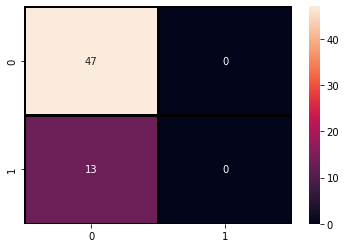

In [ ]:
sns.heatmap(confusion_matrix(test_y, predict_output),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(test_y,predict_output))

### 6.2 Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset<a class="anchor" id="6.2"></a>

In [ ]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 79.29%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1  accuracy   macro avg  weighted avg
precision    0.792857   0.0  0.792857    0.396429      0.628622
recall       1.000000   0.0  0.792857    0.500000      0.792857
f1-score     0.884462   0.0  0.792857    0.442231      0.701252
support    333.000000  87.0  0.792857  420.000000    420.000000
_______________________________________________
Confusion Matrix: 
 [[333   0]
 [ 87   0]]

Test Result:
Accuracy Score: 79.44%
_______________________________________________
CLASSIFICATION REPORT:
                    0     1  accuracy   macro avg  weighted avg
precision    0.794444   0.0  0.794444    0.397222      0.631142
recall       1.000000   0.0  0.794444    0.500000      0.

In [ ]:
# Get score for different values of n
decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

results = cross_val_score(decision_tree, x_train, y_train, cv=skf)
print(results.mean())

0.6428571428571429


In [ ]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs=6)

grid.fit(x_train,y_train)

model = grid.best_estimator_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [ ]:
grid.best_score_

0.7928571428571429

In [ ]:
predict_output = model.predict(x_test)
accuracy_test = accuracy_score(y_test,predict_output)
accuracy_test

0.7944444444444444

              precision    recall  f1-score   support

           0       0.79      1.00      0.89       143
           1       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



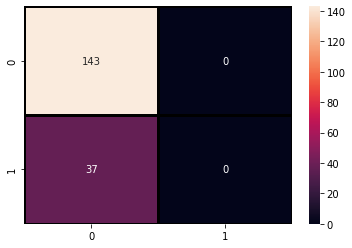

In [ ]:
sns.heatmap(confusion_matrix(y_test, predict_output),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,predict_output))

#### Observation:
+ In both the condition, due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.

[Table of Contents](#0.1)

## 7. Handling imbalance data using SMOTE based techniques<a class="anchor" id="7"></a>

#### Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling techniques. The reason being, in undersampling we tend to remove instances from data that may be carrying some important information. In this article, I am specifically covering some special data augmentation oversampling techniques: SMOTE and its related counterparts.

+ ##### <b>SMOTE: Synthetic Minority Oversampling Technique</b>
+ SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.

+ <b>Working Procedure</b>:
At first the total no. of oversampling observations, N is set up. Generally, it is selected such that the binary class distribution is 1:1. But that could be tuned down based on need. Then the iteration starts by first selecting a positive class instance at random. Next, the KNN’s (by default 5) for that instance is obtained. At last, N of these K instances is chosen to interpolate new synthetic instances. To do that, using any distance metric the difference in distance between the feature vector and its neighbors is calculated. Now, this difference is multiplied by any random value in (0,1] and is added to the previous feature vector. This is pictorially represented below:
![image.png](attachment:image.png)


Though this algorithm is quite useful, it has few drawbacks associated with it.

+ i) The synthetic instances generated are in the same direction i.e. connected by an artificial line its diagonal instances. This in turn complicates the decision surface generated by few classifier algorithms.

+ ii) SMOTE tends to create a large no. of noisy data points in feature space.

In [ ]:
x = data.drop(['taxable_category'], axis=1)
y = data['taxable_category']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

In [ ]:
# summarize
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

>Train: 0=333, 1=87, Test: 0=143, 1=37
Shape of X_train:  (420, 5)
Shape of X_test:  (180, 5)
Shape of y_train:  (420,)
Shape of y_test (180,)


### 7.1 SMOTE Oversampling technique<a class="anchor" id="7.1"></a>

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 333, 1: 87})
After Counter({0: 333, 1: 333})


### 7.2 ADASYN: Adaptive Synthetic Sampling Approach<a class="anchor" id="7.2"></a>
ADASYN is a generalized form of the SMOTE algorithm. This algorithm also aims to oversample the minority class by generating synthetic instances for it. But the difference here is it considers the density distribution, ri which decides the no. of synthetic instances generated for samples which difficult to learn. Due to this, it helps in adaptively changing the decision boundaries based on the samples difficult to learn. This is the major difference compared to SMOTE.

<b>Working Procedure</b>:
From the dataset, the total no. of majority N– and minority N+ are captured respectively. Then we preset the threshold value, dth for the maximum degree of class imbalance. Total no. of synthetic samples to be generated, G = (N– – N+) x β. Here, β = (N+/ N–).\
For every minority sample xi, KNN’s are obtained using Euclidean distance, and ratio ri is calculated as Δi/k and further normalized as rx <= ri / ∑ rᵢ .\
Thereafter, the total synthetic samples for each xi will be, gi = rx x G. Now we iterate from 1 to gi to generate samples the same way as we did in SMOTE.\
The below-given diagram represents the above procedure:

![image.png](attachment:image.png)

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 333, 1: 87})
After Counter({0: 333, 1: 327})


### 7.3 Hybridization: SMOTE + Tomek Links<a class="anchor" id="7.3"></a>
Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.

SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. Now, Tomek links are the opposite class paired samples that are the closest neighbors to each other. Therefore the majority of class observations from these links are removed as it is believed to increase the class separation near the decision boundaries. Now, to get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links

[Table of Contents](#0.1)

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 333, 1: 87})
After Counter({0: 239, 1: 239})


### 7.4 Hybridization: SMOTE + ENN<a class="anchor" id="7.4"></a>
SMOTE + ENN is another hybrid technique where more no. of observations are removed from the sample space. Here, ENN is yet another undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted.

Integrating this technique with oversampled data done by SMOTE helps in doing extensive data cleaning. Here on misclassification by NN’s samples from both the classes are removed. This results in a more clear and concise class separation.

<b>Python Code for SMOTE + ENN algorithm:

In [ ]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 333, 1: 87})
After Counter({0: 87, 1: 82})


##### The below-given picture shows how different SMOTE based resampling techniques work out to deal with imbalanced data.

![image.png](attachment:image.png)

![Filter_Method](https://c.tenor.com/uIXA-brBP9UAAAAC/thanos-perfectlybalanced.gif)

### 7.5 SMOTE + UNDER SAMPLING<a class="anchor" id="7.5"></a>

In [ ]:
sm = SMOTE(sampling_strategy = .3)
rus =  RandomUnderSampler(sampling_strategy=.4)

pipeline = Pipeline(steps = [('smote', sm),('under',rus)])

counter = Counter(y_train)
print('Before',counter)
#over and undersampling the train dataset using SMOTE + RandomUnderSampler
x_train_smrus, y_train_smrus = pipeline.fit_resample(x_train, y_train)

counter = Counter(y_train_smrus)
print('After',counter)

Before Counter({0: 333, 1: 87})
After Counter({0: 247, 1: 99})


[Table of Contents](#0.1)

### 7.6 Performance Analysis after Resampling<a class="anchor" id="7.6"></a>

In [ ]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn],
    'UNDERSAMPLING': [x_train_smrus, y_train_smrus]
}

In [ ]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)
    #plt.show()
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))

    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')


    return algo,precision,recall,f1,sampling

In [ ]:
model_params = {
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']
        }

    }

}

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with ACTUAL
Confusion Matrix
[[142   1]
 [ 37   0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       143
           1       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180
 

AUC-ROC
0.44953694953694956
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with SMOTE
Confusion Matrix
[[78 65]
 [19 18]] 

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.55      0.65       143
           1       0.22      0.49      0.30        37

    accuracy                           0.53       180
   macro avg       0.51      0.52      0.47       180
weighted avg       0.68      0.53      0.58       180
 

AUC-ROC
0.4982989

#### As the results can be compared, SMOTE TOMEK Hybridization technique gave the best results we are going to use it further

In [ ]:
counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=0)
x_train_smtom, y_train_smtom = smtom.fit_resample(x, y)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 476, 1: 124})
After Counter({0: 354, 1: 354})


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smtom,y_train_smtom,test_size=0.3,random_state=0, stratify=y_train_smtom)

counter = Counter(y_train_smtom)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({0: 354, 1: 354})
After Counter({1: 248, 0: 247})
Shape of X_train:  (495, 5)
Shape of X_test:  (213, 5)
Shape of y_train:  (495,)
Shape of y_test (213,)


[Table of Contents](#0.1)

## 8. Pruning<a class="anchor" id="8"></a>
It is another method that can help us avoid overfitting. It helps in improving the performance of the tree by cutting the nodes or sub-nodes which are not significant. It removes the branches which have very low importance.

The performance of a tree can be further increased by pruning. It involves removing the branches that make use of features having low importance. This way, we reduce the complexity of tree, and thus increasing its predictive power by reducing overfitting.

Pruning can start at either root or the leaves. The simplest method of pruning starts at leaves and removes each node with most popular class in that leaf, this change is kept if it doesn't deteriorate accuracy. Its also called **reduced error pruning**. More sophisticated pruning methods can be used such as **cost complexity pruning** where a learning parameter <b>(alpha)</b> is used to weigh whether nodes can be removed based on the size of the sub-tree. This is also known as **weakest link pruning.**

Pruning: Getting an Optimal Decision tree
Pruning is a process of deleting the unnecessary nodes from a tree in order to get the optimal decision tree.

A too-large tree increases the risk of overfitting, and a small tree may not capture all the important features of the dataset. Therefore, a technique that decreases the size of the learning tree without reducing accuracy is known as Pruning. There are mainly two types of tree pruning technology used:

+ Cost Complexity Pruning
+ Reduced Error Pruning.

There are mainly 2 ways for pruning:

(i) <b>Pre-pruning</b> – `we can stop growing the tree earlier, which means we can prune/remove/cut a node if it has low importance while growing the tree.`

(ii) <b>Post-pruning</b> – `once our tree is built to its depth, we can start pruning the nodes based on their significance.`

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 6))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 6)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 72.53%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.796791    0.681818  0.725253    0.739305      0.739189
recall       0.603239    0.846774  0.725253    0.725007      0.725253
f1-score     0.686636    0.755396  0.725253    0.721016      0.721085
support    247.000000  248.000000  0.725253  495.000000    495.000000
_______________________________________________
Confusion Matrix: 
 [[149  98]
 [ 38 210]]

Test Result:
Accuracy Score: 63.38%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.745763    0.590909  0.633803    0.668336      0.668699
recall       

#### This is a balanced state of training and testing accuracy are close to each other where there is no overfitting or underfitting yet we can do better than this, let's try post pruning technique using <font color='red'><b>Alpha</b></font> Values

[Table of Contents](#0.1)

### 8.1 Building Decision Tree Classifier using Entropy Criteria with Alpha values Post Pruning<a class="anchor" id="8.1"></a>

#### Post pruning decision trees with cost complexity pruning
.. currentmodule:: sklearn.tree

The :class:`DecisionTreeClassifier` provides parameters such as `min_samples_leaf` and `max_depth` to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In :class:`DecisionTreeClassifier`, this pruning technique is parameterized by the cost complexity parameter, `ccp_alpha`. Greater values of `ccp_alpha` increase the number of nodes pruned. Here we only show the effect of `ccp_alpha` on regularizing the trees and how to choose a `ccp_alpha` based on validation scores.

See also `minimal_cost_complexity_pruning` for details on pruning.

#### 1. Information Gain:
+ Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
+ It calculates how much information a feature provides us about a class.
+ According to the value of information gain, we split the node and build the decision tree.
+ A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:

**`Information Gain= Entropy(S)- [(Weighted Avg) *Entropy(each feature) `**
![image.png](attachment:image.png)

#### Entropy
+ Entropy is nothing but the uncertainty in our dataset or measure of disorder. Let me try to explain this with the help of an example.
+ Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. Entropy can be calculated as:
![image.png](attachment:image.png)
Intuitively, it tells us about the predictability of a certain event. Example, consider a coin toss whose probability of heads is 0.5 and probability of tails is 0.5. Here the entropy is the highest possible, since there’s no way of determining what the outcome might be. Alternatively, consider a coin which has heads on both the sides, the entropy of such an event can be predicted perfectly since we know beforehand that it’ll always be heads. In other words, this event has no randomness hence it’s entropy is zero. In particular, lower values imply less uncertainty while higher values imply high uncertainty.

In [ ]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

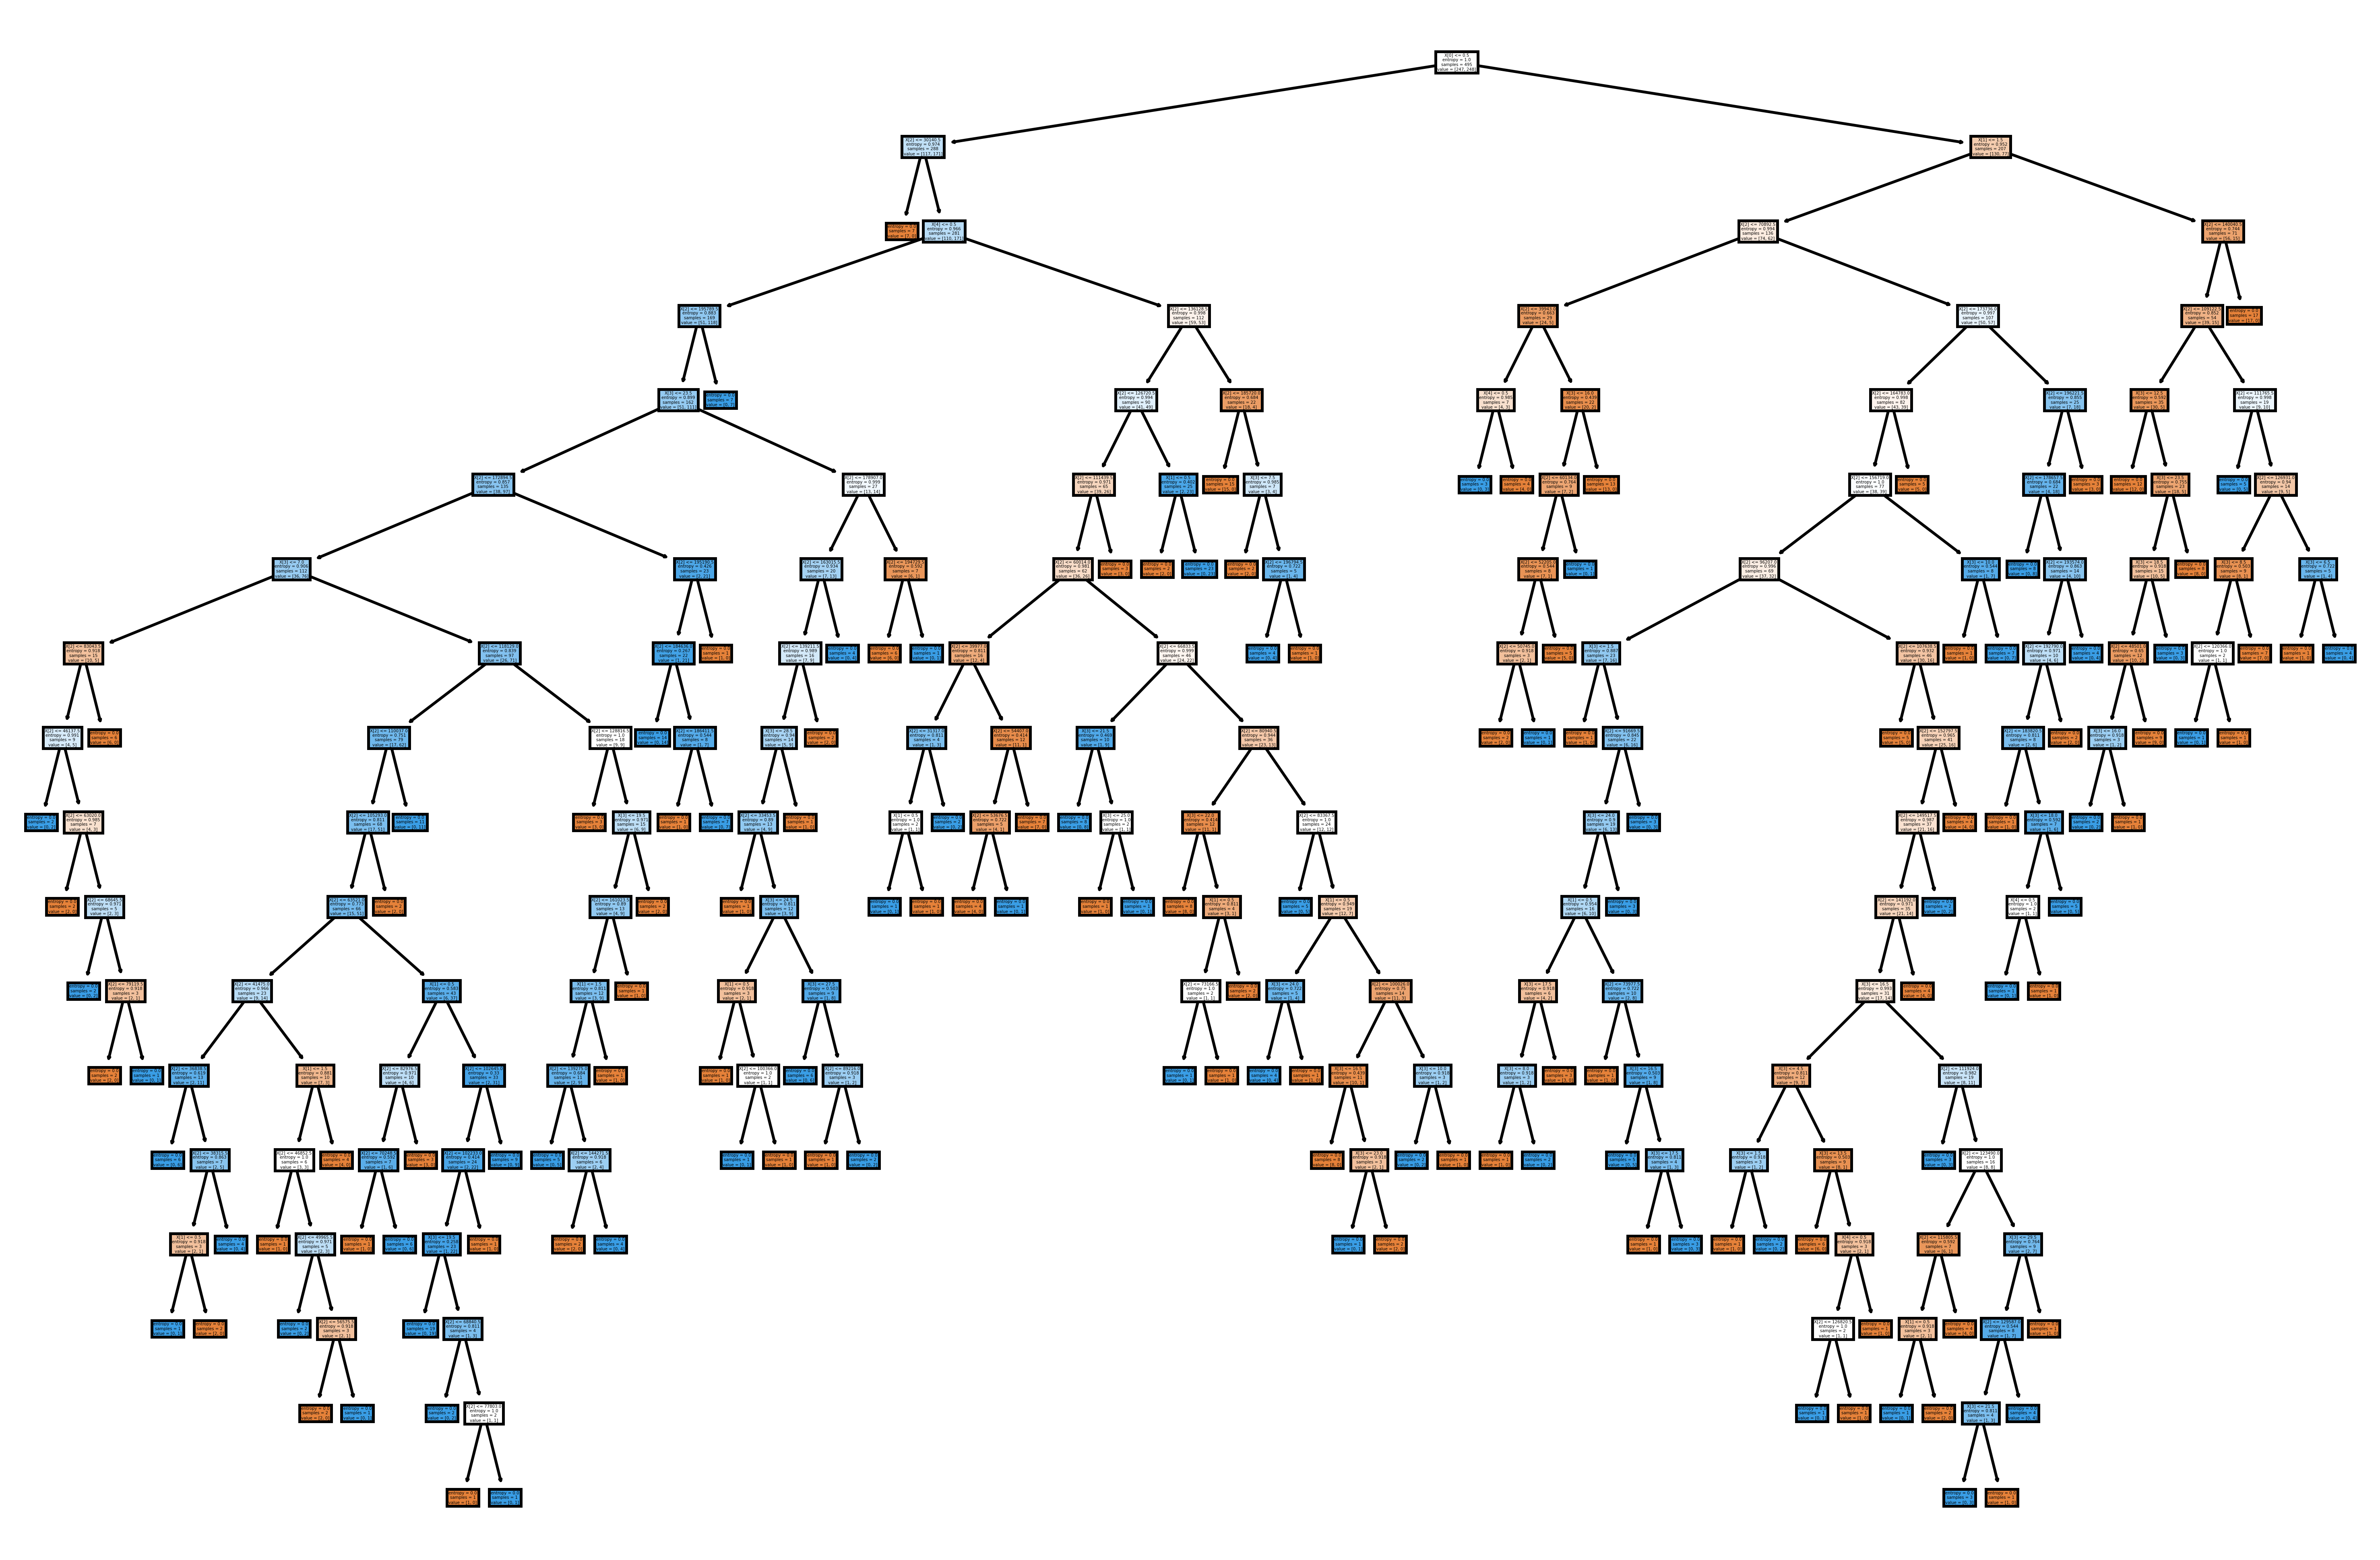

In [ ]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [ ]:
#Predicting on test data
preds = model_entropy.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    114
0     99
dtype: int64

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0              0   1
taxable_category        
0                 72  35
1                 27  79

In [ ]:
# Accuracy
np.mean(preds==y_test)

0.7089201877934272

In [ ]:
# Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       107
           1       0.69      0.75      0.72       106

    accuracy                           0.71       213
   macro avg       0.71      0.71      0.71       213
weighted avg       0.71      0.71      0.71       213



In [ ]:
path = model_entropy.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03483671449999548


For the remainder of this example, we remove the last element in `clfs` and `ccp_alphas`, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

[Table of Contents](#0.1)

#### 8.1.1 Accuracy vs alpha for training and testing sets<a class="anchor" id="8.1.1"></a>
When `ccp_alpha` is set to zero and keeping the other default parameters of :class:`DecisionTreeClassifier`, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting `ccp_alpha=0.015` maximizes the testing accuracy.

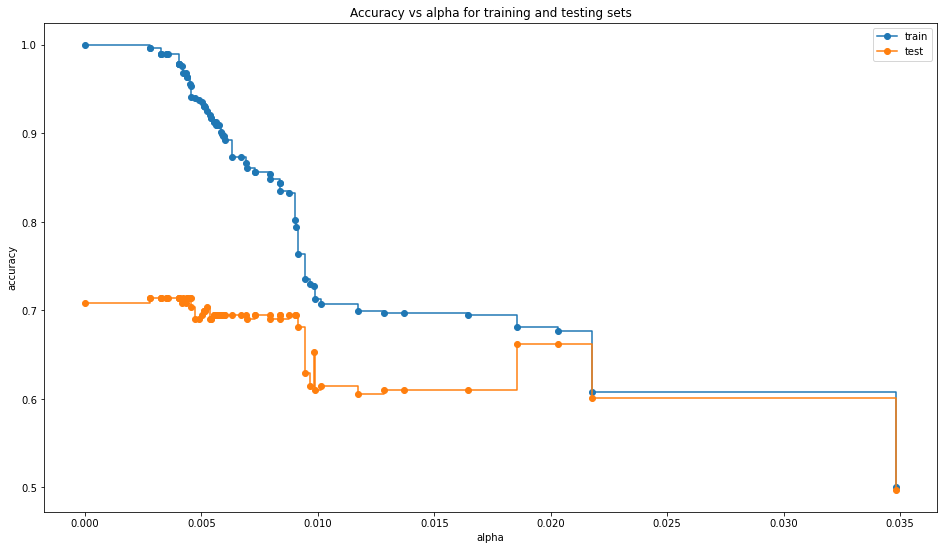

In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
ccp_alphas

array([0.        , 0.00278271, 0.00278271, 0.00327789, 0.00327789,
       0.00327789, 0.00347614, 0.00358472, 0.0040404 , 0.0040404 ,
       0.0040404 , 0.0040404 , 0.00418354, 0.0042057 , 0.00432669,
       0.00439244, 0.00439244, 0.00450489, 0.00457508, 0.00457752,
       0.00474448, 0.0048833 , 0.00501596, 0.00510975, 0.00510975,
       0.00510975, 0.00514465, 0.0052586 , 0.00536401, 0.0054222 ,
       0.00543425, 0.00556543, 0.00556543, 0.00563857, 0.00564996,
       0.00568264, 0.00578216, 0.00584666, 0.00586864, 0.00592811,
       0.00599022, 0.0060361 , 0.00633277, 0.00669476, 0.00694089,
       0.00696626, 0.0072922 , 0.0072922 , 0.00794834, 0.00795074,
       0.00836709, 0.00836709, 0.00838426, 0.00878488, 0.00904298,
       0.0090675 , 0.00916011, 0.00946924, 0.00966038, 0.00983548,
       0.00985999, 0.01015159, 0.01171316, 0.0128471 , 0.01371097,
       0.01646919, 0.01856816, 0.02031208, 0.02178524, 0.03483671])

#### Choosing the best value of **`cc_alpha`** where the testing and training accuracy are almost same or near or closer to each other

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=0.00983548)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00983548, criterion='entropy',
                       random_state=0)

In [ ]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.7272727272727273 
Testing Accuracy 0.6525821596244131


              precision    recall  f1-score   support

           0       0.64      0.72      0.68       107
           1       0.68      0.59      0.63       106

    accuracy                           0.66       213
   macro avg       0.66      0.66      0.66       213
weighted avg       0.66      0.66      0.66       213



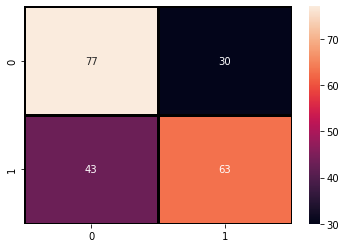

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred_test),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,pred_test))

+ Below diagram explains the general structure of a decision tree:
![image.png](attachment:image.png)
##### Before learning more about decision trees let’s get familiar with some of the terminologies.
<b>Root Nodes</b> – `It is the node present at the beginning of a decision tree from this node the population starts dividing according to various features.`

<b>Decision Nodes</b> – `the nodes we get after splitting the root nodes are called Decision Node`

<b>Leaf Nodes</b> – `Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.`

<b>Branch/Sub-tree</b> – `just like a small portion of a graph is called sub-graph similarly a sub-section of this decision tree is called sub-tree.`

<b>Pruning</b> – `is nothing but cutting down some nodes to stop overfitting.`

<b>Splitting</b> - `Splitting is the process of dividing the decision node/root node into sub-nodes according to the given conditions.`

<b>Pruning</b> - `Pruning is the process of removing the unwanted branches from the tree`

<b>Parent/Child node</b> - `The root node of the tree is called the parent node, and other nodes are called the child nodes.`

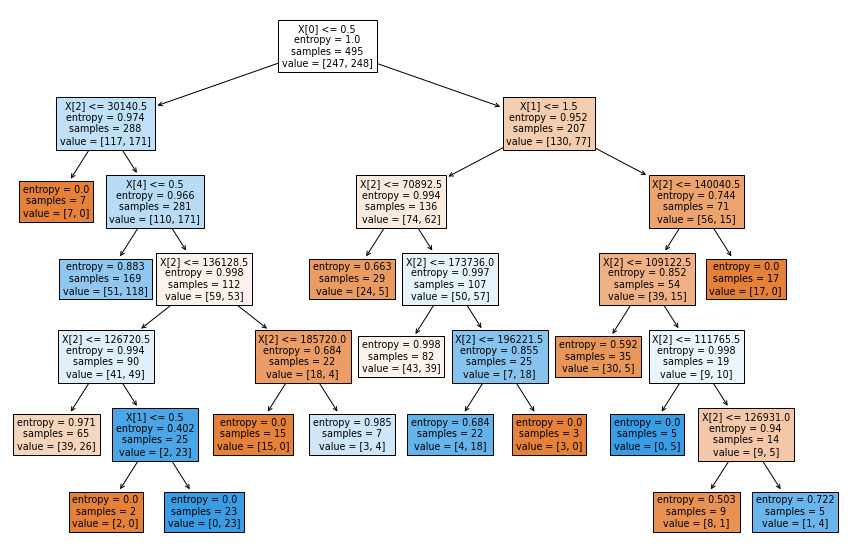

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

### 8.2 Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning<a class="anchor" id="8.2"></a>

#### Post pruning decision trees with cost complexity pruning
.. currentmodule:: sklearn.tree

The :class:`DecisionTreeClassifier` provides parameters such as `min_samples_leaf` and `max_depth` to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In :class:`DecisionTreeClassifier`, this pruning technique is parameterized by the cost complexity parameter, `ccp_alpha`. Greater values of `ccp_alpha` increase the number of nodes pruned. Here we only show the effect of `ccp_alpha` on regularizing the trees and how to choose a `ccp_alpha` based on validation scores.

See also `minimal_cost_complexity_pruning` for details on pruning.

### Gini Index:
+ Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.
+ An attribute with the low Gini index should be preferred as compared to the high Gini index.
+ It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.
+ Gini index can be calculated using the below formula:

**`Gini Index= 1- ∑jPj2`**


In [ ]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

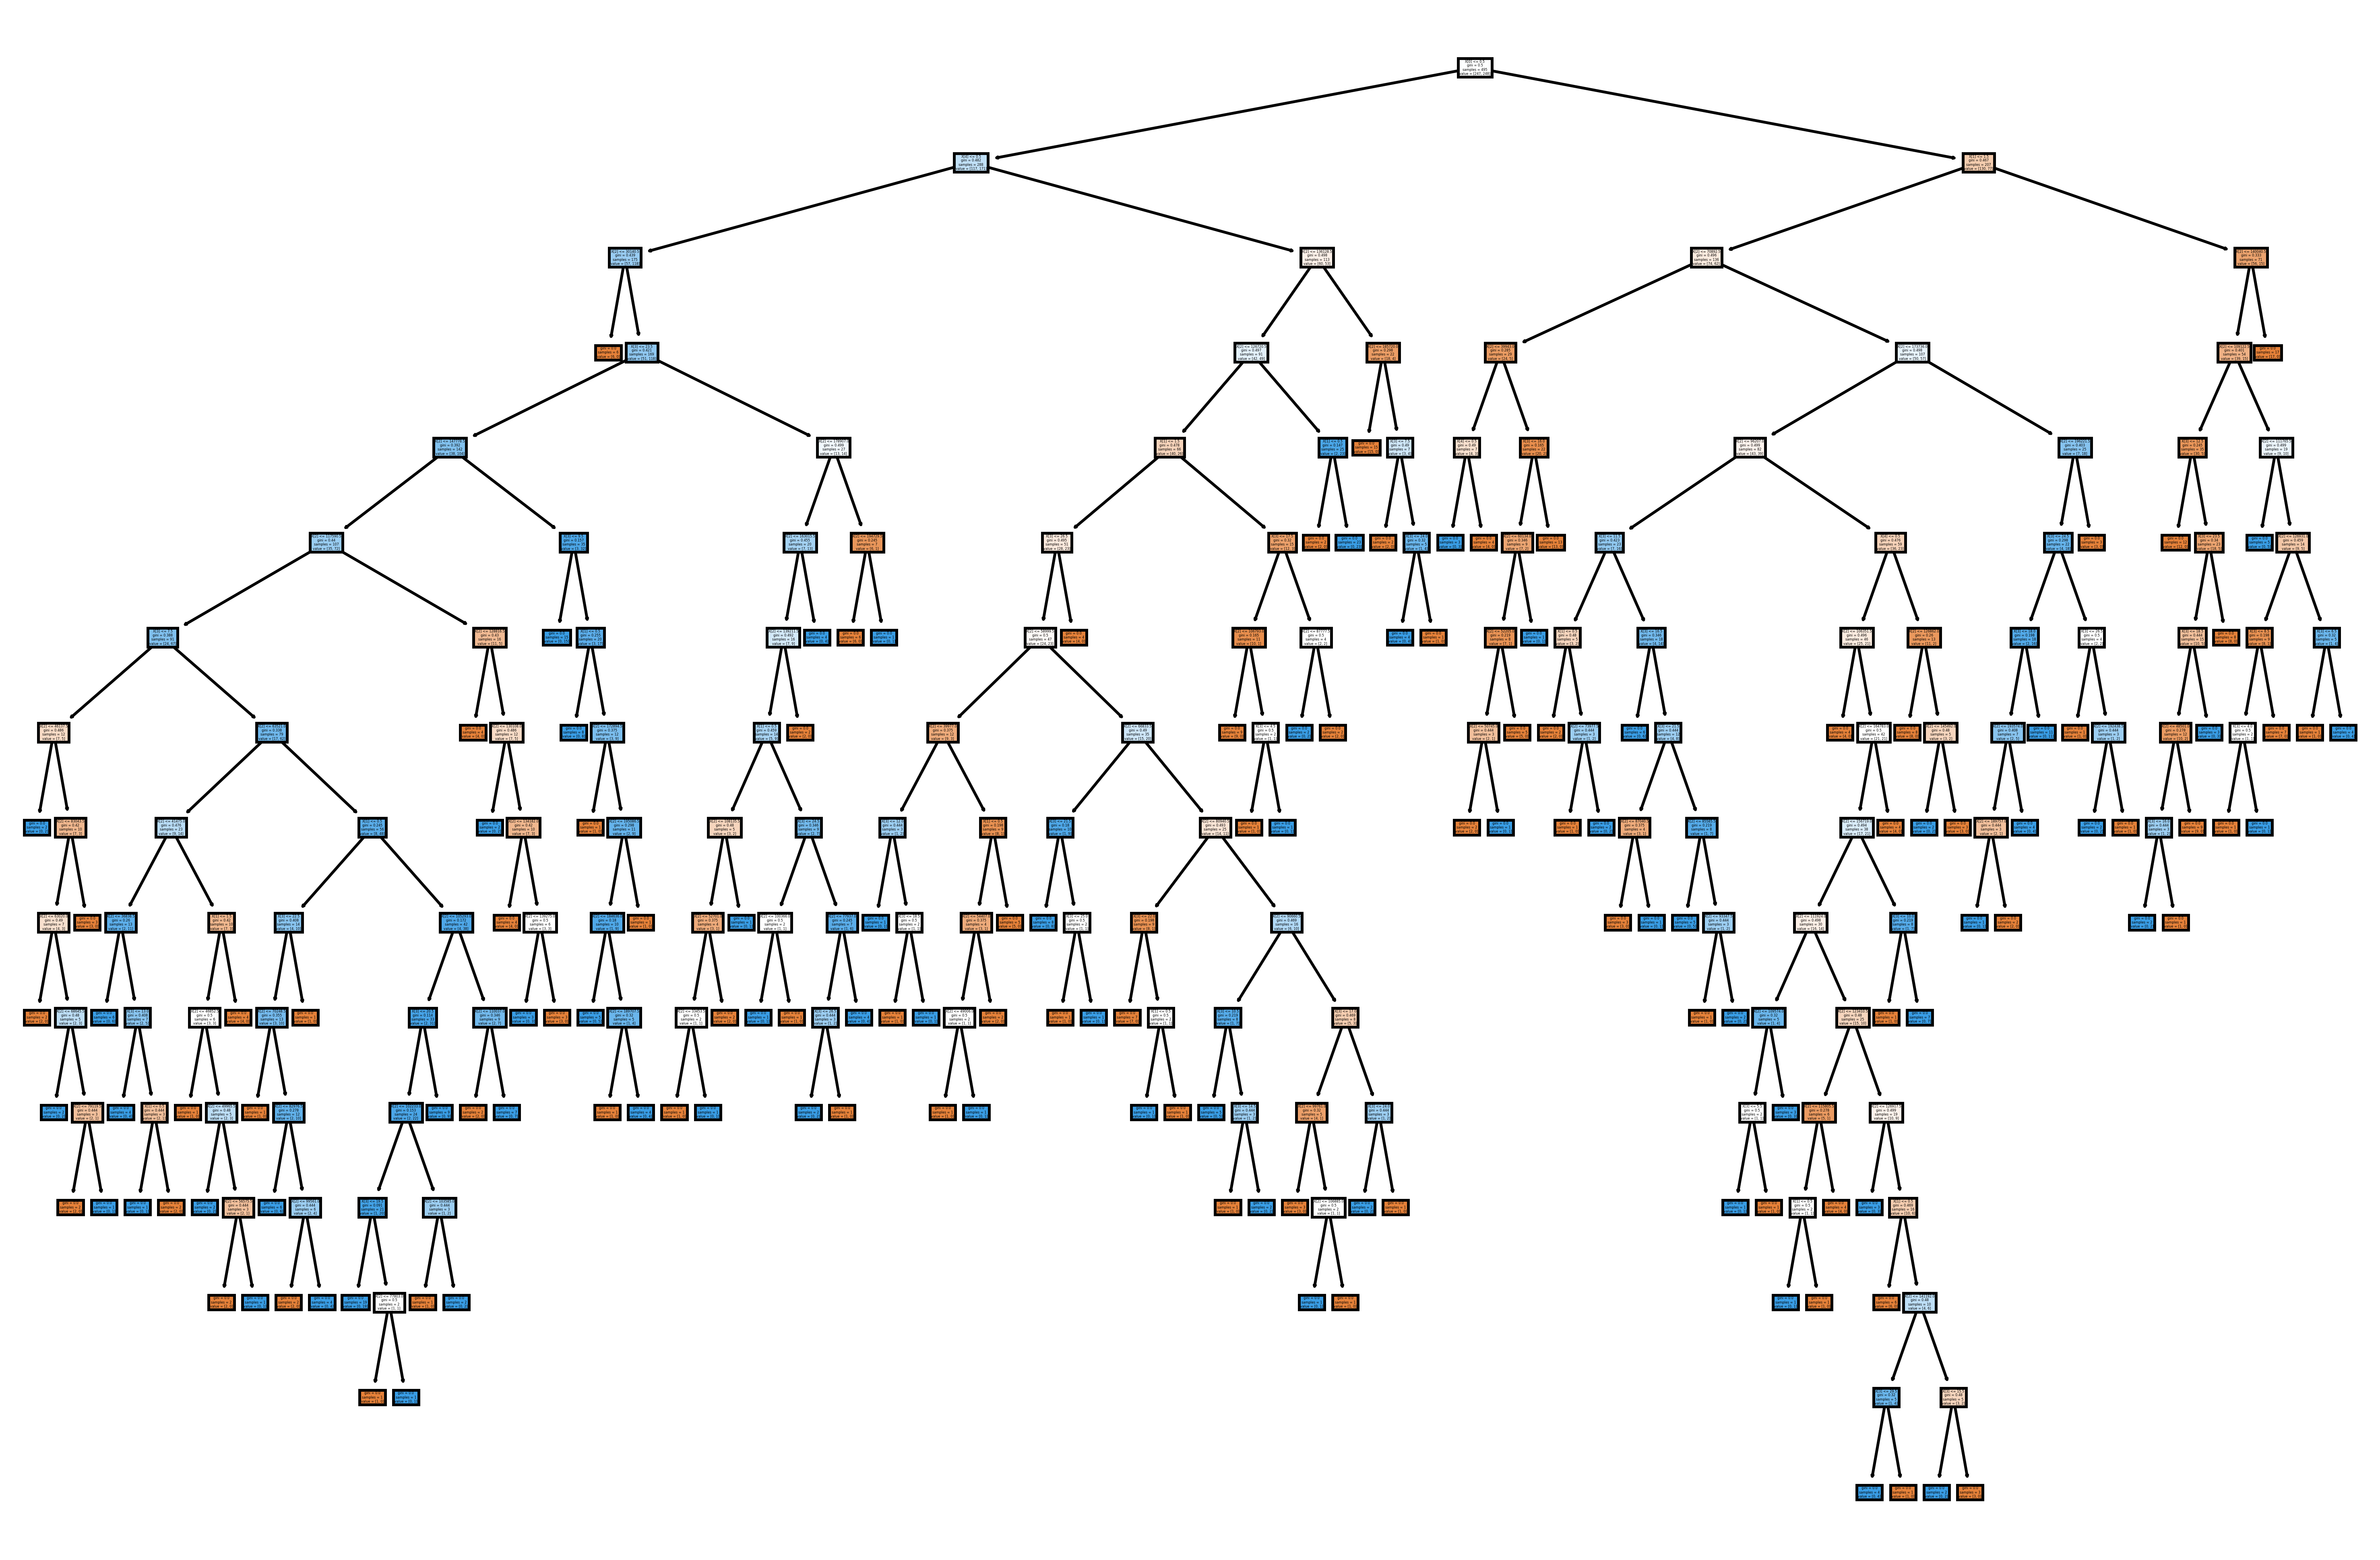

In [ ]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()

In [ ]:
#Predicting on test data
preds = model_gini.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    124
0     89
dtype: int64

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0              0   1
taxable_category        
0                 64  43
1                 25  81

In [ ]:
# Accuracy
np.mean(preds==y_test)

0.6807511737089202

In [ ]:
# Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.72      0.60      0.65       107
           1       0.65      0.76      0.70       106

    accuracy                           0.68       213
   macro avg       0.69      0.68      0.68       213
weighted avg       0.69      0.68      0.68       213



In [ ]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.023932351623392523


For the remainder of this example, we remove the last element in `clfs` and `ccp_alphas`, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

#### 8.2.1 Accuracy vs alpha for training and testing sets<a class="anchor" id="8.2.2"></a>
When `ccp_alpha` is set to zero and keeping the other default parameters of :class:`DecisionTreeClassifier`, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting `ccp_alpha=0.015` maximizes the testing accuracy.

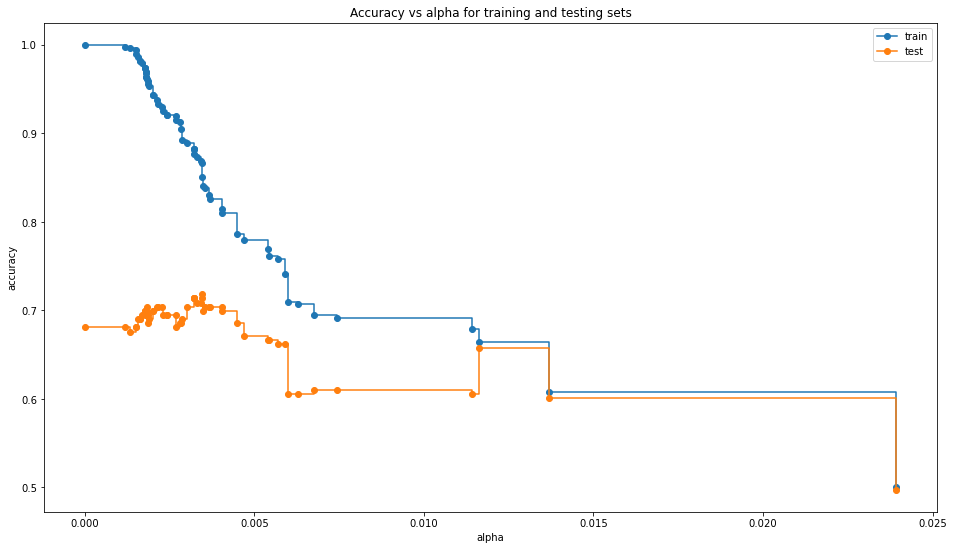

In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
ccp_alphas

array([0.        , 0.00119716, 0.0013468 , 0.00151515, 0.00151821,
       0.00157127, 0.00161616, 0.00161616, 0.0016835 , 0.00176768,
       0.00176768, 0.00176768, 0.00179574, 0.00179574, 0.00181818,
       0.00181818, 0.00181818, 0.00183655, 0.00185346, 0.00186147,
       0.00190542, 0.0020202 , 0.0020202 , 0.00212121, 0.00217172,
       0.0022792 , 0.00229568, 0.00242424, 0.00242424, 0.0026936 ,
       0.00269841, 0.00280584, 0.00282279, 0.00287351, 0.00301194,
       0.00323232, 0.00323232, 0.00323232, 0.00323232, 0.00329966,
       0.0034188 , 0.0034632 , 0.00346801, 0.00347222, 0.00353535,
       0.0036556 , 0.00369408, 0.00404033, 0.0040404 , 0.00449995,
       0.00468636, 0.00538827, 0.00543903, 0.00570461, 0.00591554,
       0.00600582, 0.00629673, 0.0067583 , 0.00743434, 0.01141341,
       0.01162234, 0.01368911, 0.02393235])

#### Choosing the best value of **`cc_alpha`** where the testing and training accuracy are almost same or near or closer to each other

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=0.00600582)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00600582, random_state=0)

In [ ]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.7414141414141414 
Testing Accuracy 0.6619718309859155


              precision    recall  f1-score   support

           0       0.64      0.72      0.68       107
           1       0.68      0.59      0.63       106

    accuracy                           0.66       213
   macro avg       0.66      0.66      0.66       213
weighted avg       0.66      0.66      0.66       213



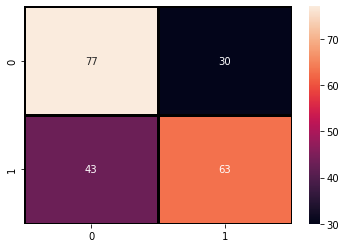

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred_test),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,pred_test))

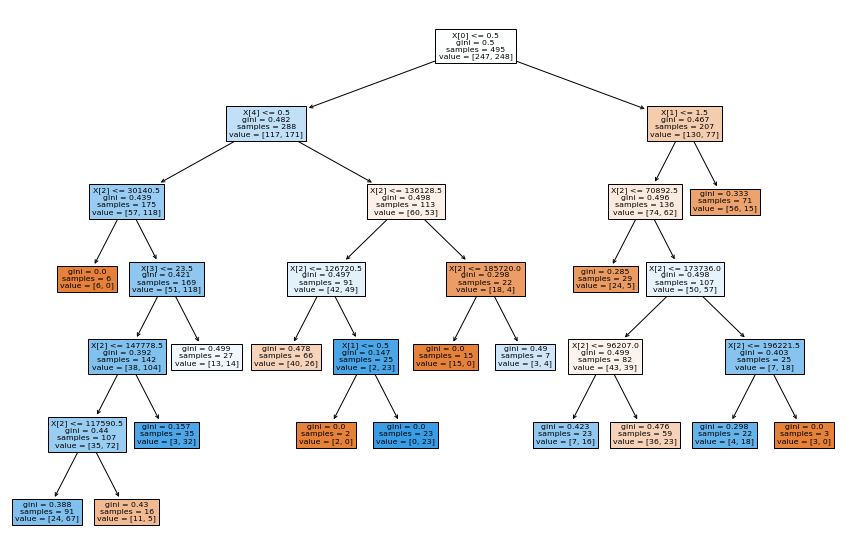

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

[Table of Contents](#0.1)

## 9. Advantages of CART<a class="anchor" id="9"></a>
+ ### Simple to understand, interpret, visualize.
+ ### Decision trees implicitly perform variable screening or feature selection.
+ ### Can handle both numerical and categorical data. Can also handle multi-output problems.
+ ### Decision trees require relatively little effort from users for data preparation.
+ ### Nonlinear relationships between parameters do not affect tree performance
+ ### It is simple to understand as it follows the same process which a human follow while making any decision in real-life.
+ ### It can be very useful for solving decision-related problems.
+ ### It helps to think about all the possible outcomes for a problem.

## 10. Disadvantages of CART<a class="anchor" id="10"></a>
+ ### Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting.
+ ### Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.
+ ### Greedy algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees, where the features and samples are randomly sampled with replacement.
+ ### Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the data set prior to fitting with the decision tree.
+ ### It may have an overfitting issue, which can be resolved using the Random Forest algorithm.
+ ### For more class labels, the computational complexity of the decision tree may increase.